In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
#urls = search_images_ddg('dosa', max_images=50)
#len(urls),urls[0]

In [4]:
#for x in range(0,51):
#    download_url(urls[x], 'images/dosa/'+str(x)+'.jpg')
#im = Image.open('images/dosa/5.jpg')
#im.thumbnail((256,256))
#im

In [5]:
#path = Path('images')

In [6]:
# cut everything before "recipe"
import sys, csv
import pandas as pd

In [7]:
f = open('FoodData.csv', "r")
csv_file = csv.reader(f, delimiter=",")

In [8]:
allergens = {}
for row in csv_file:
    allergens[(row[3]).strip().lower()] = row[4]
    allergens[(row[3]+"s").strip().lower()] = row[4]
    
allergens.pop('food')
allergens.pop('foods')

'Allergy'

In [9]:
allergens["carrots"]

'Hypersensitivity'

In [10]:
f = open('IndianFoodDatasetCSV.csv', "r")
df = pd.read_csv('IndianFoodDatasetCSV.csv', delimiter=",")

In [11]:
#testing regex
#import re
#regex = re.compile('[^a-zA-Z ]')
#regex.sub('', "Spicy Tomato Rice (Recipe)")

In [12]:
import re

all_foods = {}
for x in range(len(df["TranslatedRecipeName"])):
    food_name = str(df["TranslatedRecipeName"][x])
    food_ing = str(df["TranslatedIngredients"][x])
    regex = re.compile('[^a-zA-Z ,]')
    food_ing = regex.sub('', food_ing).lower()
    ind = food_name.find("Recipe")
    food_name = food_name[:ind]
    regex2 = re.compile('[^a-zA-Z ]')
    food_name = regex2.sub('', food_name).strip()
    all_foods[food_name] = food_ing.split(",")
    
# gotta do stuff w the food - meaning use regex to make it only alpha and remove everything before recipe + lowercase
# same w the ingredients - remove non alpha characters NOT COMMAS and all measurements, split then by comma to get individual ingreds

In [13]:
# leaving ONLY allergens in the dictionary, taking out the rest of the ingredients + excess stuff

food_to_allergens = {}
for food in all_foods:
    food_to_allergens[food] = []
    for allergen in allergens:
        if ''.join(all_foods[food]).find(" " + allergen + " ") != -1:
            food_to_allergens[food].append(allergen)

In [14]:
#for food in all_foods:
#    urls = search_images_ddg(food, max_images=200)
#    for x in range(0,200):
#        try: download_url(urls[x], 'food/'+food+'/'+str(x)+'.jpg')
#        except: "url not working"

In [15]:
path = Path('food')
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

In [16]:
failed

(#0) []

In [57]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [58]:
food = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [59]:
dls = food.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


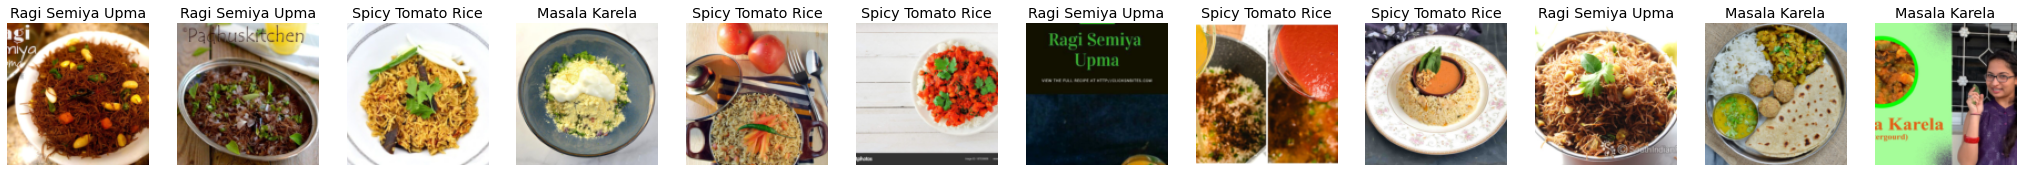

In [60]:
dls.valid.show_batch(max_n=12, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


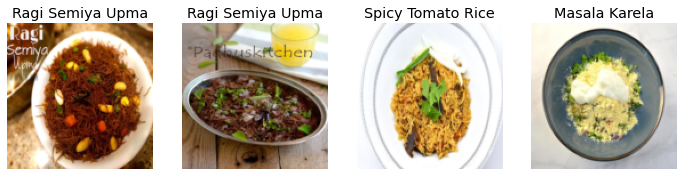

In [61]:
food = food.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = food.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


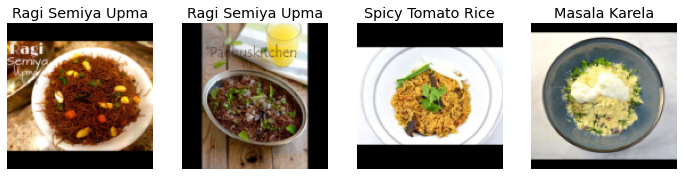

In [62]:
food = food.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = food.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


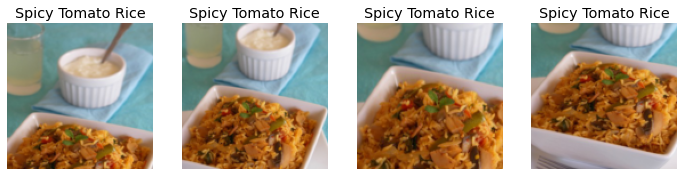

In [63]:
food = food.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = food.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


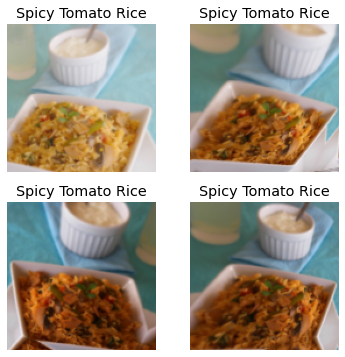

In [64]:
food = food.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = food.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=2, unique=True)

In [65]:
food = food.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = food.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [66]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4) # end after 3, otherwise overtraining --> a higher valid_loss (maybe 4 now? should test this later)

epoch,train_loss,valid_loss,error_rate,time
0,1.598689,0.876265,0.342857,01:41


epoch,train_loss,valid_loss,error_rate,time
0,0.777720,0.758794,0.266667,02:02
1,0.635651,0.610717,0.200000,02:02
2,0.538754,0.459678,0.171429,02:03
3,0.453523,0.437575,0.152381,02:03


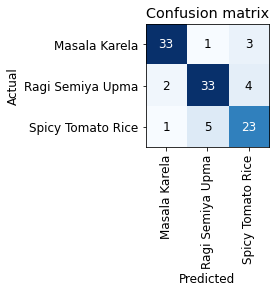

In [67]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [68]:
#interp.plot_top_losses(10, nrows=1)

In [69]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [75]:
for idx in cleaner.delete(): 
    print(idx)
    cleaner.fns[idx].unlink()

0


In [77]:
dls = food.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [79]:
food = food.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = food.dataloaders(path)
food = food.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = food.dataloaders(path)
food = food.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = food.dataloaders(path)
food = food.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = food.dataloaders(path)
food = food.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = food.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [81]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fit_one_cycle(5) #4 -> 0.106 error rate, maxes out @ 5

epoch,train_loss,valid_loss,error_rate,time
0,1.699013,1.125757,0.510204,01:40
1,1.343073,0.619881,0.234694,01:42
2,1.078107,0.427741,0.153061,01:38
3,0.879553,0.384123,0.112245,01:45
4,0.759227,0.381047,0.081633,01:39
5,0.681055,0.392790,0.081633,01:37


In [86]:
learn.export()

In [87]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [88]:
learn_inf = load_learner(path/'export.pkl')

In [90]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [92]:
img = PILImage.create(btn_upload.data[-1])

In [93]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [94]:
pred,pred_idx,probs = learn_inf.predict(img)

In [95]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Masala Karela; Probability: 0.9972')

In [96]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [99]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [100]:
btn_upload = widgets.FileUpload()

In [101]:
VBox([widgets.Label('Select your Indian food!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [103]:
!pip install python3
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

ERROR: Could not find a version that satisfies the requirement python3 (from versions: none)
ERROR: No matching distribution found for python3


ERROR: nbdev 1.1.22 has requirement nbconvert<6, but you'll have nbconvert 6.1.0 which is incompatible.



  Attempting uninstall: traitlets
    Found existing installation: traitlets 4.3.3
    Uninstalling traitlets-4.3.3:
      Successfully uninstalled traitlets-4.3.3


Enabling: voila
- Writing config: C:\Users\anzpa\Anaconda3\etc\jupyter
    - Validating...
      voila 0.2.13 ok
